In [1]:
#hide
%matplotlib inline
import math
import requests
import pandas as pd
import numpy as np
import altair as alt
from IPython.display import HTML
import matplotlib.pyplot as plt
import folium

In [3]:
india_url = "https://api.covid19india.org/data.json"
r = requests.get(india_url)
data_json = r.json()
#print(data_json)
data_state = data_json['statewise']
states_df = pd.DataFrame(data_state)

In [4]:
states_df.head()

,active,confirmed,deaths,delta,lastupdatedtime,recovered,state
0,1022,1139,27,"{'active': 0, 'confirmed': 0, 'deaths': 0, 're...",29/03/2020 23:57:24,90,Total
1,185,202,1,"{'active': 0, 'confirmed': 0, 'deaths': 0, 're...",29/03/2020 18:17:24,16,Kerala
2,171,203,7,"{'active': 0, 'confirmed': 0, 'deaths': 0, 're...",29/03/2020 19:17:24,25,Maharashtra
3,75,83,3,"{'active': 0, 'confirmed': 0, 'deaths': 0, 're...",29/03/2020 18:52:24,5,Karnataka
4,68,70,1,"{'active': 0, 'confirmed': 0, 'deaths': 0, 're...",29/03/2020 23:12:24,1,Telangana


In [5]:
stateList = states_df['state'].values.tolist()
confirmedList = states_df['confirmed'].values.tolist()
activeList = states_df['active'].values.tolist()
deathList = states_df['deaths'].values.tolist()
confirmed = [int(i) for i in confirmedList] 
active = [int(i) for i in activeList] 
death = [int(i) for i in deathList] 
stateList.pop(0)
confirmed.pop(0)
active.pop(0)
death.pop(0)

27

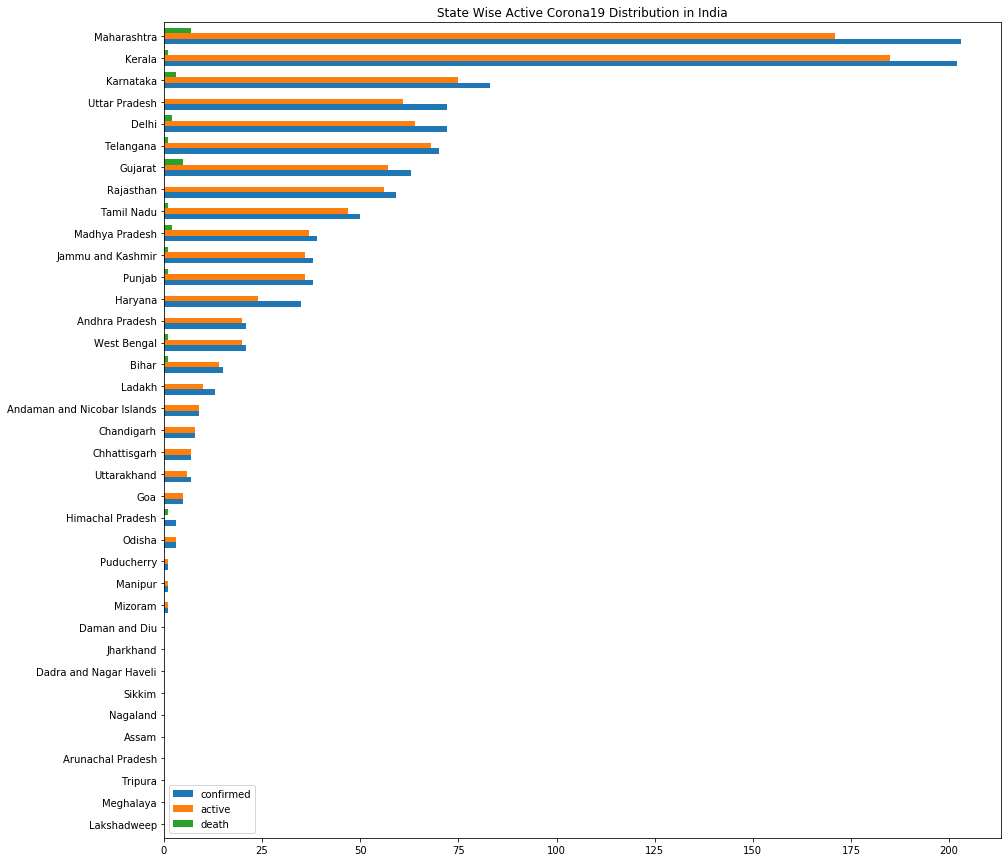

In [7]:
data = pd.DataFrame({'confirmed': confirmed,'active': active, 'death': death}, index=stateList)
data = data.sort_values(by='confirmed')

ax = data.plot.barh(figsize=(15, 15), width=0.75, title='State Wise Active Corona19 Distribution in India')



In [8]:
fig = ax.get_figure()
fig.savefig("indiaStateWise.png")

In [10]:
dfState= pd.read_csv("states.csv")
dfState.head()

,city,lat,lng,country,iso2,state,capital,population,population_proper
0,Mumbai,18.987807,72.836447,India,IN,Maharashtra,admin,18978000.0,12691836.0
1,Delhi,28.651952,77.231495,India,IN,Delhi,admin,15926000.0,7633213.0
2,Kolkata,22.562627,88.363044,India,IN,West Bengal,admin,14787000.0,4631392.0
3,Chennai,13.084622,80.248357,India,IN,Tamil Nadu,admin,7163000.0,4328063.0
4,Bengalūru,12.977063,77.587106,India,IN,Karnataka,admin,6787000.0,5104047.0


In [11]:
data = pd.DataFrame({'state': stateList,'confirmed': confirmed,'active': active, 'death': death})
data.head()

,state,confirmed,active,death
0,Kerala,202,185,1
1,Maharashtra,203,171,7
2,Karnataka,83,75,3
3,Telangana,70,68,1
4,Uttar Pradesh,72,61,0


In [12]:
result = pd.merge(dfState, data,on='state')
result.head()

,city,lat,lng,country,iso2,state,capital,population,population_proper,confirmed,active,death
0,Mumbai,18.987807,72.836447,India,IN,Maharashtra,admin,18978000.0,12691836.0,203,171,7
1,Delhi,28.651952,77.231495,India,IN,Delhi,admin,15926000.0,7633213.0,72,64,2
2,Kolkata,22.562627,88.363044,India,IN,West Bengal,admin,14787000.0,4631392.0,21,20,1
3,Chennai,13.084622,80.248357,India,IN,Tamil Nadu,admin,7163000.0,4328063.0,50,47,1
4,Bengalūru,12.977063,77.587106,India,IN,Karnataka,admin,6787000.0,5104047.0,83,75,3


In [14]:
'''
del lat
del lng
del percent
del total
del cnfmd
'''

state = result['state'].tolist()
city = result['city'].tolist()
lat = result['lat'].tolist()
lng = result['lng'].tolist()
cnfmd = result['confirmed'].tolist()


percent = []
total = sum(cnfmd)
total = total*1.0
print(total)

for i in range(0, len(cnfmd)):
    value = (cnfmd[i]/total)*100
    percent.append(value)

1139.0


In [16]:
d={'state': state,
   'city':city,
   'lat':lat,
   'lng':lng,
   'percent':percent}

pdf=pd.DataFrame(d)
pdf = pdf.sort_values(by='percent', ascending=False)

pdf.head(37)

,state,city,lat,lng,percent
0,Maharashtra,Mumbai,18.987807,72.836447,17.822651
15,Kerala,Thiruvananthapuram,8.485498,76.949238,17.734855
4,Karnataka,Bengalūru,12.977063,77.587106,7.287094
1,Delhi,Delhi,28.651952,77.231495,6.321335
7,Uttar Pradesh,Lucknow,26.839281,80.923133,6.321335
5,Telangana,Hyderabad,17.384052,78.456355,6.145742
6,Gujarat,Ahmadābād,23.025793,72.587265,5.531168
29,Rajasthan,Jaipur,26.913312,75.787872,5.179982
3,Tamil Nadu,Chennai,13.084622,80.248357,4.389816
9,Madhya Pradesh,Bhopal,23.254688,77.402892,3.424056


In [17]:
j = 0
map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
for j in pdf.index:
    if (pdf['percent'][j] > 0.0):
        folium.CircleMarker([pdf['lat'][j], pdf['lng'][j]], radius=float(pdf['percent'][j]), color='crimson', fill_color='crimson').add_to(map)
    else:
        print("percent is 0")
        continue

map.save("indiaCovid.html")

percent is 0
percent is 0
percent is 0
percent is 0
percent is 0
percent is 0
percent is 0
percent is 0
percent is 0
percent is 0
